In [1]:
# importing the basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
# reading the Modi Tweets csv
imdb=pd.read_csv('C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
imdb.shape

(748, 2)



# Bag of word analysis

  We take text column as input and identify the individual words and their frequency of each unique word.
  From those individual words we will come to an idea what area the words are refering .
  
  

In [4]:
from wordcloud import WordCloud

## Word size /font size depends on the frequency of the word i.e higher freq is in bigger size

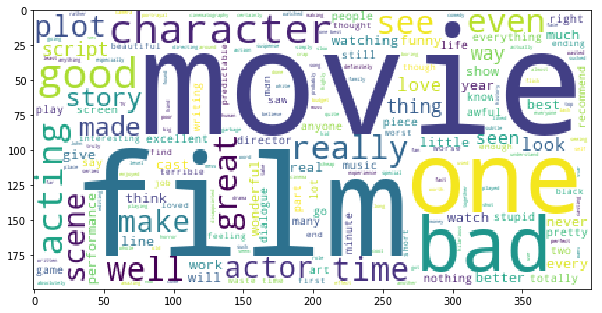

In [5]:
# joining all the values in column text in Modi tweet into a singke string
plt.figure(figsize=[10,8])
text=' '.join(imdb['review'])
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)



WE see that Modi Speaks more about India,people,Government,will,Mannibat,development progreess,nation,today

# Text Cleaning

- converting every character to lower case to avoid the redudancy due to case sensitivity
- remove special character and junk values
- remove stopwords
- identify root if the word called as stemming/Lemmatization

# General function to do text cleaning

In [18]:
docs=imdb['review'].str.lower().str.replace('[^a-z ]','')
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend([])# to add custom stopword list to our original list ofn stopwords
stemmer=nltk.stem.PorterStemmer()
# Function to clean the each doc with stopwords and lemmitiation
def clean_doc(doc):
    words=doc.split(" ")
    words_clean=[stemmer.stem(w) for w in words if w not in stopwords]
    return(' '.join(words_clean))# re-joining back the the words to docs
docs_clean=docs.apply(clean_doc)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

# Train - Test Split

In [19]:
from sklearn.model_selection import  train_test_split
train,test=train_test_split(docs_clean,test_size=0.2,random_state=100)

### Document term Matrix- We collate all documents/tweets together to form a matrix with columns as no of unique terms/words and rows as each tweet/docs
#### Corpus= collection of documents

1 word per term--> unigram   -(1,1)
2 words per term --> bigram  -(2,2)
3 words per term--> trigram  -(3,3) 

## always use fit() for training, tranform() for validation,test data avoid Data leak

In [20]:
# document-term matrix creation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()# drops the least appearing terms
vectorizer.fit(train)# to identify the Features
dtm_train=vectorizer.transform(train) # converts to matrix
dtm_test=vectorizer.transform(test) # converts to matrix


In [21]:
# converting the DTM into a structured matrix format
df_dtm_train=pd.DataFrame(dtm_train.toarray(),columns=vectorizer.get_feature_names())
df_dtm_test=pd.DataFrame(dtm_test.toarray(),columns=vectorizer.get_feature_names())
print(df_dtm_test.shape)
print(df_dtm_train.shape)

(150, 2083)
(598, 2083)


In [22]:
# taking Labels
train_y=imdb.iloc[train.index]['sentiment']
test_y=imdb.iloc[test.index]['sentiment']

# For balanced Dataset we use Accuracy score otherwise we use F1 score/ AUC

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_sc-ore
rfcl=RandomForestClassifier(random_state=100,n_estimators=300)
rfcl.fit(df_dtm_train,train_y)
pred=rfcl.predict(df_dtm_test)
accuracy_score(test_y,pred)*100

70.0

Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [31]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB
nbcl=MultinomialNB()
nbcl.fit(df_dtm_train,train_y)
pred_1=nbcl.predict(df_dtm_test)
accuracy_score(test_y,pred_1)*100

77.33333333333333

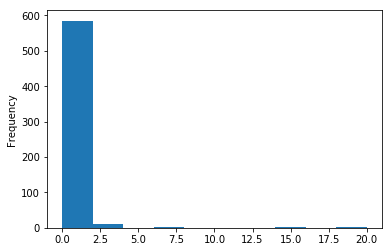

In [30]:
df_dtm_train['movi'].plot.hist()

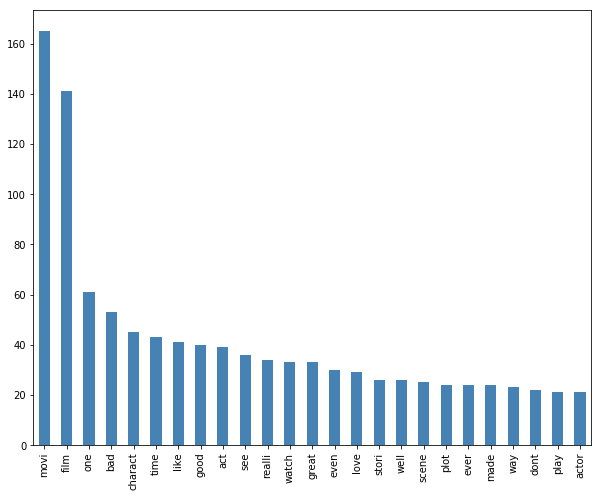

In [29]:
# column  sum to find the frequency of each term
plt.figure(figsize=[10,8])
df_dtm_train.sum().sort_values(ascending=False).head(25).plot.bar(color='steelblue')

# TF-IDF Vectorization

Term Frequency- Inverse Document Frequency

it will help reduce weightage/importance of to a term which appears in all documents as it might give any additional information to us


In [33]:
# document-term matrix creation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer=TfidfVectorizer()# drops the least appearing terms
vectorizer.fit(train)# to identify the Features
dtm_train=vectorizer.transform(train) # converts to matrix
dtm_test=vectorizer.transform(test) # converts to matrix


# converting the DTM into a structured matrix format
df_dtm_train=pd.DataFrame(dtm_train.toarray(),columns=vectorizer.get_feature_names())
df_dtm_test=pd.DataFrame(dtm_test.toarray(),columns=vectorizer.get_feature_names())
print(df_dtm_test.shape)
print(df_dtm_train.shape)

# taking Labels
train_y=imdb.iloc[train.index]['sentiment']
test_y=imdb.iloc[test.index]['sentiment']

# For balanced Dataset we use Accuracy score otherwise we use F1 score/ AUC



(150, 2083)
(598, 2083)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfcl=RandomForestClassifier(random_state=100)
rfcl.fit(df_dtm_train,train_y)
pred=rfcl.predict(df_dtm_test)
accuracy_score(test_y,pred)*100



C:\Users\HII\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


71.33333333333334

In [37]:
#Naive Bayes classifier for multinomial models

#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.


from sklearn.naive_bayes import GaussianNB,MultinomialNB
nbcl=MultinomialNB()
nbcl.fit(df_dtm_train,train_y)
pred_1=nbcl.predict(df_dtm_test)
accuracy_score(test_y,pred_1)*100

80.0